In [2]:
import yfinance as yf
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy.stats import skew, kurtosis
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import load_iris
import csv

In [15]:
# Specify the stock symbol and the desired date range
st = input("Que -accion? ")
desde= input("Desde que Fecha?(A-M-D) ")
hasta= input("Hasta que Fecha?(A-M-D) ")

stock_symbol = 'st'
start_date = desde
end_date = hasta

In [16]:
# Retrieve the historical price data using yfinance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)


[*********************100%%**********************]  1 of 1 completed


In [17]:
def calculate_support_resistance(data):
    pivot_point = (data['High'] + data['Low'] + data['Close']) / 3
    support_l1 = (pivot_point * 2) - data['High']
    support_l2 = pivot_point - (data['High'] - data['Low'])
    resistance_l1 = (pivot_point * 2) - data['Low']
    resistance_l2 = pivot_point + (data['High'] - data['Low'])
    
    return pivot_point, support_l1, support_l2, resistance_l1, resistance_l2

pivot_point, support_l1, support_l2, resistance_l1, resistance_l2 = calculate_support_resistance(stock_data)


In [18]:
# Create a DataFrame to store the calculated levels
levels_data = pd.DataFrame({'Pivot Point': pivot_point,
                            'Support Level 1': support_l1,
                            'Support Level 2': support_l2,
                            'Resistance Level 1': resistance_l1,
                            'Resistance Level 2': resistance_l2})


In [23]:
df = levels_data
df.to_csv('x.csv')

In [20]:

print(levels_data)

            Pivot Point  Support Level 1  Support Level 2  Resistance Level 1  \
Date                                                                            
2010-03-11    18.500000        18.000000        17.500000           19.000000   
2010-03-12    17.983334        17.276667        16.413334           18.846666   
2010-03-15    17.886667        17.653332        17.406665           18.133334   
2010-03-16    17.699999        17.499999        17.099999           18.100000   
2010-03-17    18.020000        17.779999        17.409999           18.390000   
...                 ...              ...              ...                 ...   
2023-10-16    37.389999        37.020000        36.610001           37.799999   
2023-10-17    37.649999        37.209998        36.729997           38.130000   
2023-10-18    36.686666        36.163333        35.896665           36.953334   
2023-10-19    36.043334        35.446668        35.143336           36.346666   
2023-10-20    35.590001     

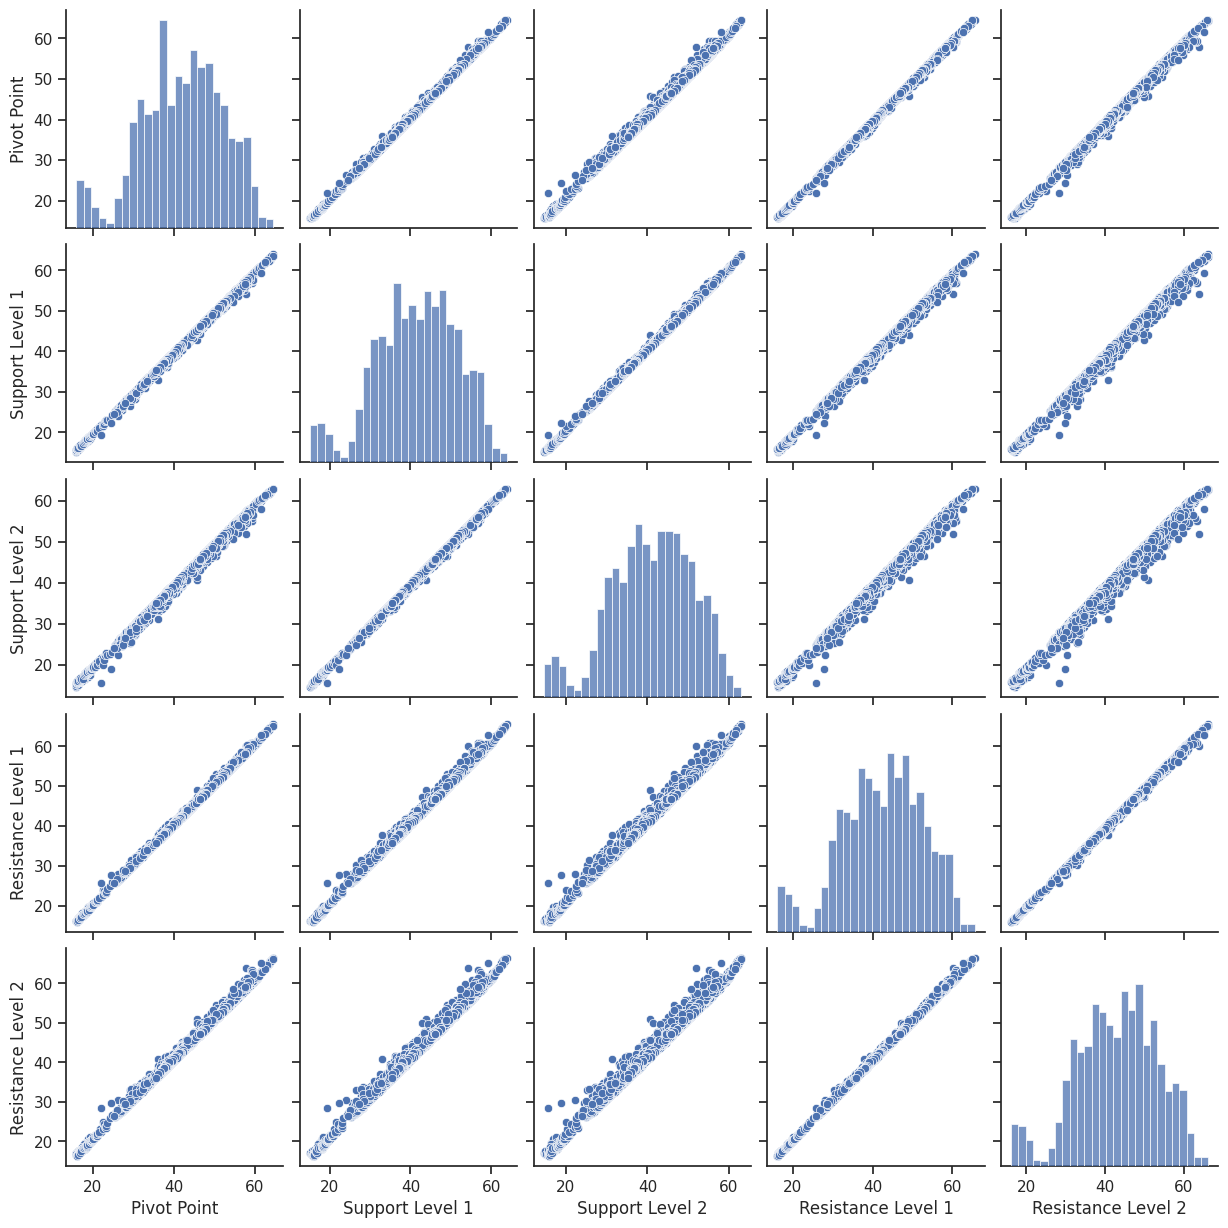

In [21]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(levels_data)

plt.show();

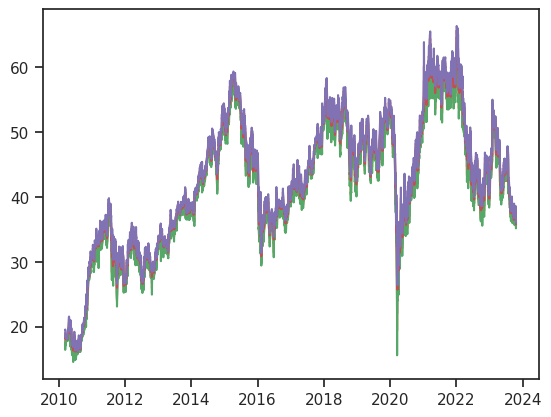

In [22]:
plt.plot(levels_data);
